**What Is Logistic Regression?**

*   
Logistic Regression is a machine learning algorithm that helps us predict a Yes or No (or 1 or 0) answer.


**What is a Neural network?**



*   A Neural Network is a computer model inspired by the human brain that learns patterns from data.
*  It’s made up of layers of tiny decision-making units called neurons – just like brain cells – that work together to solve problems.





In [ ]:
import h5py
import numpy as np

def load_dataset():
    train_dataset = h5py.File("train_catvnoncat.h5", "r")
    test_dataset = h5py.File("test_catvnoncat.h5", "r")

    X_train = np.array(train_dataset["train_set_x"][:])  # (m_train, 64, 64, 3)
    y_train = np.array(train_dataset["train_set_y"][:])  # (m_train,)

    X_test = np.array(test_dataset["test_set_x"][:])      # (m_test, 64, 64, 3)
    y_test = np.array(test_dataset["test_set_y"][:])      # (m_test,)

    # Flatten + Normalize
    X_train_flatten = X_train.reshape(X_train.shape[0], -1).T / 255.0  # shape (12288, m_train)
    X_test_flatten = X_test.reshape(X_test.shape[0], -1).T / 255.0     # shape (12288, m_test)

    y_train = y_train.reshape(1, -1)  # shape (1, m_train)
    y_test = y_test.reshape(1, -1)    # shape (1, m_test)

    return X_train_flatten, y_train, X_test_flatten, y_test


**IMPLEMENTATION OF LOGISTIC REGRESSION USING A NEURAL NETWORK**

What Does the Neural Network Do in This Case?

*  We're using a very simple neural network with just one layer – this is the neural network version of logistic regression


It takes an image and decides: "Is this a cat (1) or not a cat (0)?"

**Structure of the Neural Network (in this example)**

💡 Number of Layers: 2

Input Layer

Output Layer (Logistic Neuron)

There are no hidden layers here — that’s what makes it equivalent to logistic regression. It’s the simplest form of a neural network.

**Layer 1: Input Layer**

*  Each image is 64×64 pixels with 3 color channels (Red, Green, Blue).
*  Total input neurons = 64 × 64 × 3 = 12,288
*  These 12,288 numbers (called features) are flattened into a 1D array (a column of numbers).

**Layer 2: Output Layer (Logistic Unit)**

This is a single neuron that:

Multiplies each input by a weight, adds bias and applies the sigmoid function


*  **z = W · x + b**
*  **a = sigmoid(z)**

W = weights (one for each input pixel)

x = input vector (the image flattened)

b = bias term

a = output (probability between 0 and 1)

If **a > 0.5, we classify it as a cat**

Else, we classify it as not a cat


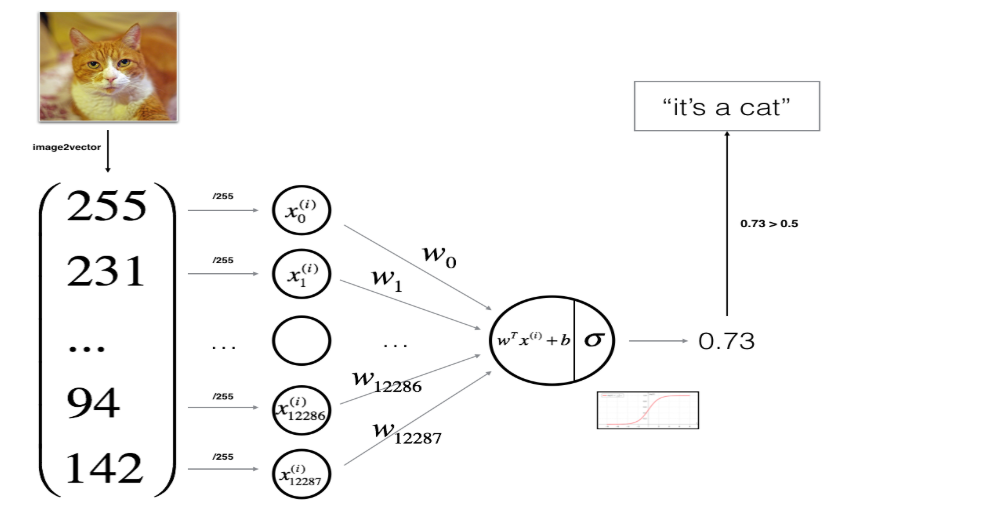











In [ ]:
class LogisticRegressionNN:
    def __init__(self, learning_rate=0.005, epochs=2000):
        # Set learning rate (how fast we learn) and number of training steps
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.losses = []  # To store loss after every 100 epochs for visualization

    def sigmoid(self, z):
        # Activation function to squash values between 0 and 1
        return 1 / (1 + np.exp(-z))

    def initialize(self, dim):
        # Initialize weights and bias to zeros
        # dim = number of features (pixels in image)
        self.w = np.zeros((dim, 1))  # weights (column vector)
        self.b = 0                   # bias (scalar)

    def propagate(self, X, Y):
        # Forward and backward pass to calculate loss and gradients

        m = X.shape[1]  # number of training examples

        # Forward pass: compute activation (prediction)
        A = self.sigmoid(np.dot(self.w.T, X) + self.b)

        # Compute the loss (cross-entropy)
        cost = -np.sum(Y * np.log(A + 1e-8) + (1 - Y) * np.log(1 - A + 1e-8)) / m

        # Backward pass: compute gradients
        dw = np.dot(X, (A - Y).T) / m  # gradient w.r.t weights
        db = np.sum(A - Y) / m         # gradient w.r.t bias

        grads = {"dw": dw, "db": db}
        return grads, cost

    def fit(self, X, Y):
        # Train the model

        # Step 1: initialize weights and bias
        self.initialize(X.shape[0])

        # Step 2: gradient descent loop
        for i in range(self.epochs):
            # Compute gradients and cost
            grads, cost = self.propagate(X, Y)

            # Update weights and bias
            self.w -= self.learning_rate * grads["dw"]
            self.b -= self.learning_rate * grads["db"]

            # Save loss every 100 steps
            if i % 100 == 0:
                self.losses.append(cost)
                print(f"Epoch {i}: Loss = {cost:.4f}")

    def predict(self, X):
        # Make predictions on new data
        A = self.sigmoid(np.dot(self.w.T, X) + self.b)
        return (A > 0.5).astype(int)  # Convert probabilities to 0 or 1

    def plot_loss(self):
        # Plot the loss curve to visualize learning over time
        import matplotlib.pyplot as plt
        plt.plot(np.arange(len(self.losses)) * 100, self.losses)
        plt.title("Loss over time")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.grid()
        plt.show()


🔄 How Training Works
Forward Pass:

Input image goes through the network

Output = predicted label (probability)

**Compare:**
We compare the predicted output with the actual label (0 or 1)

**Compute Loss:**
We calculate how wrong the prediction was (using a loss function)

**Backpropagation:**
The network adjusts W and b to reduce the error

This is done using gradient descent

**Repeat:**
We repeat this for many images and epochs (iterations) to make the model better

**TRAINING THE MODEL**

The model is trained for 2000 epochs (iterations over the dataset).

EPOCH: During an epoch, the model processes every data point in the training dataset once, enabling it to learn patterns and relationships within the data. It determines the the number of times the algorithm iterates through the dataset.


Epoch 0: Loss = 0.6931
Epoch 100: Loss = 0.5845
Epoch 200: Loss = 0.4669
Epoch 300: Loss = 0.3760
Epoch 400: Loss = 0.3315
Epoch 500: Loss = 0.3033
Epoch 600: Loss = 0.2799
Epoch 700: Loss = 0.2600
Epoch 800: Loss = 0.2429
Epoch 900: Loss = 0.2280
Epoch 1000: Loss = 0.2148
Epoch 1100: Loss = 0.2031
Epoch 1200: Loss = 0.1925
Epoch 1300: Loss = 0.1830
Epoch 1400: Loss = 0.1744
Epoch 1500: Loss = 0.1665
Epoch 1600: Loss = 0.1593
Epoch 1700: Loss = 0.1527
Epoch 1800: Loss = 0.1465
Epoch 1900: Loss = 0.1409
Train Accuracy: 99.04306220095694
Test Accuracy: 70.0


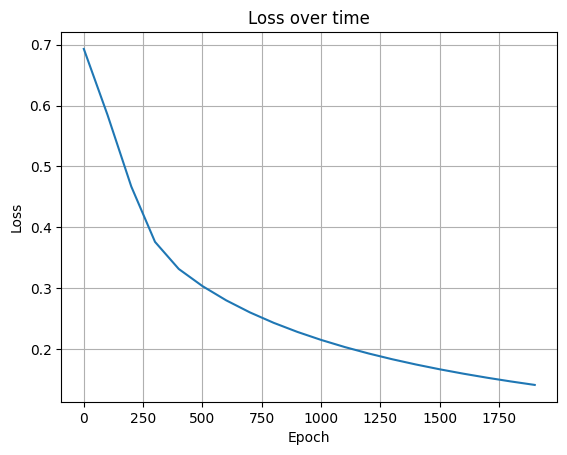

In [ ]:
from sklearn.metrics import accuracy_score

X_train, y_train, X_test, y_test = load_dataset()

model = LogisticRegressionNN(learning_rate=0.005, epochs=2000)
model.fit(X_train, y_train)

# Predictions
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train.flatten(), train_preds.flatten()) * 100)
print("Test Accuracy:", accuracy_score(y_test.flatten(), test_preds.flatten()) * 100)

model.plot_loss()


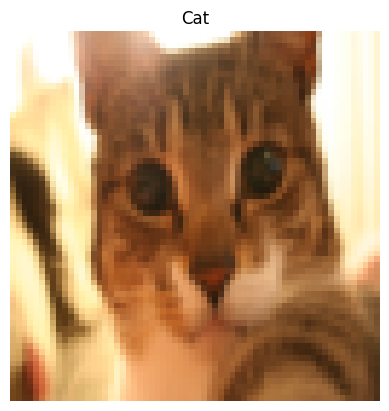

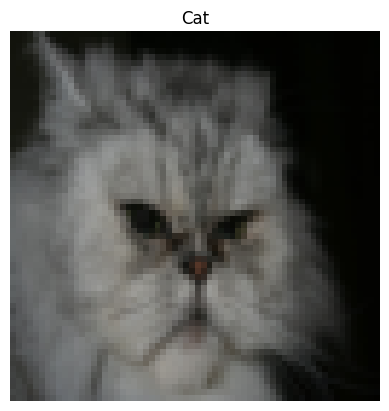

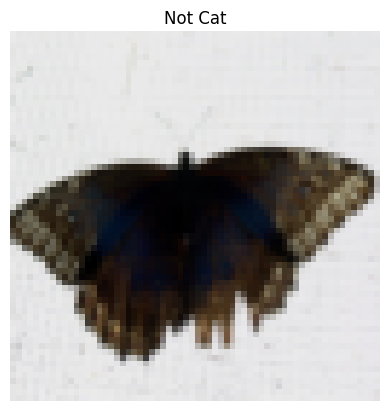

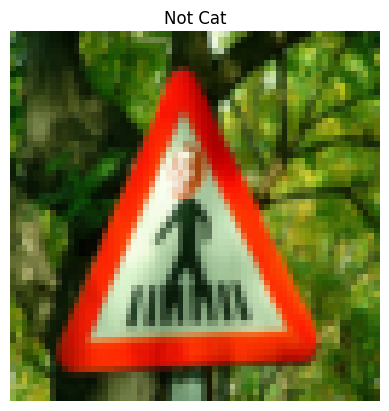

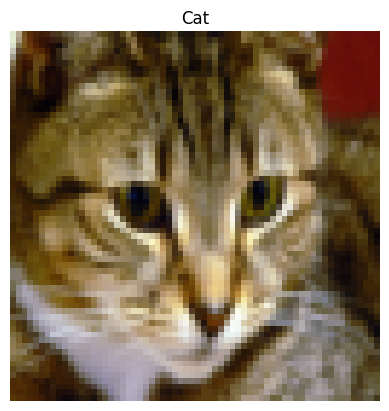

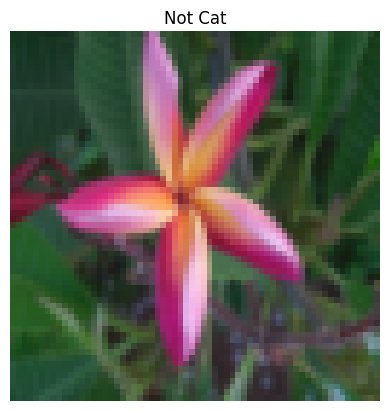

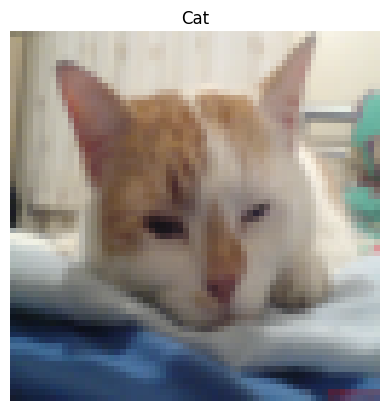

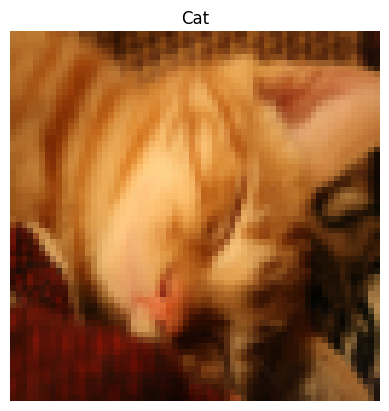

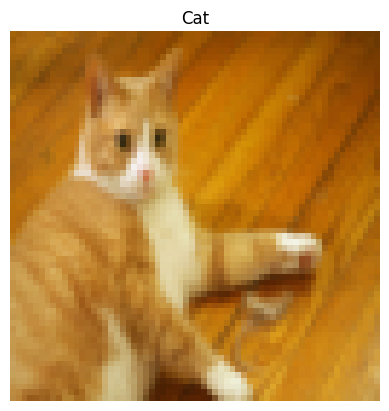

In [ ]:
import matplotlib.pyplot as plt

#visualising the images and the labels the model has assigned it

def show_image(index, X, y, is_flattened=True):
    if is_flattened:
        image = X[:, index].reshape((64, 64, 3)) * 255
    else:
        image = X[index]
    label = y[0, index]
    plt.imshow(image.astype(np.uint8))
    plt.title("Cat" if label == 1 else "Not Cat")
    plt.axis("off")
    plt.show()

#this shows the images in range 11,20
#you can change the range to visualise the model's predictions on other images in the dataset

for i in range(11, 20):
    show_image(i, X_test, y_test, is_flattened=True)
